[Sklearn Time-Related feature engineering](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html)

In [18]:
from graph_traffic.get_data import get_data, ubs_index
from graph_traffic.dataloading import npzDataset
from graph_traffic.model_selection import timeseries_cv, plot_predictions_from_features, train_estimators_by_sensor
from graph_traffic.custom_transformer import get_column_names
import numpy as np
from random import choices
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
import pandas as pd


data_dict = dict(
    ids_list=[3954, 3973, 3978],
    seq_len=12*4,
    with_graph=False,
    from_date="2019-01-01",
    to_date="2019-12-31",
    dataset_name="small",
    target="intensidad",
    interactions="drop"
)

meteo_dict = dict(
    rain="ordinal",
    wind="wind_speed",
    temperature="passthrough",
    humidity="drop",
    pressure="drop",
    radiation="passthrough"
)

temporal_dict = dict(
    year="passthrough",
    season="drop",
    month="one_hot",
    day_of_month="drop",
    weekday="drop",
    hour="spline",
    minute="drop",
    bank_holiday="passthrough",
    school_holiday="passthrough",
    working_day="passthrough",
)

get_data(data_dict, meteo_dict, temporal_dict)
dataset_name = data_dict["dataset_name"]
n_points = None
train_data = npzDataset(dataset_name, "train", n_points)
test_data = npzDataset(dataset_name, "test", n_points)

features_from_index = 3

column_names = get_column_names(meteo_dict, temporal_dict, data_dict["interactions"], data_dict["target"])
_, ubs_dict = ubs_index(data_dict["ids_list"])

train_x = train_data.x
train_y = train_data.y

test_x = test_data.x
test_y = test_data.y
random_samples = choices(range(test_x.shape[0]), k=2)
random_samples

[652, 3467]

In [19]:
train_x.shape

(20018, 48, 3, 35)

In [20]:
len(column_names)

35

In [21]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("RidgeRegression", RidgeCV())
])

estimators = train_estimators_by_sensor(data_dict["ids_list"], train_x, pipeline)

141.4638664812236 153.05170495421794
64.17101844266156 69.94588944166551
109.15532494576344 118.38892389440393


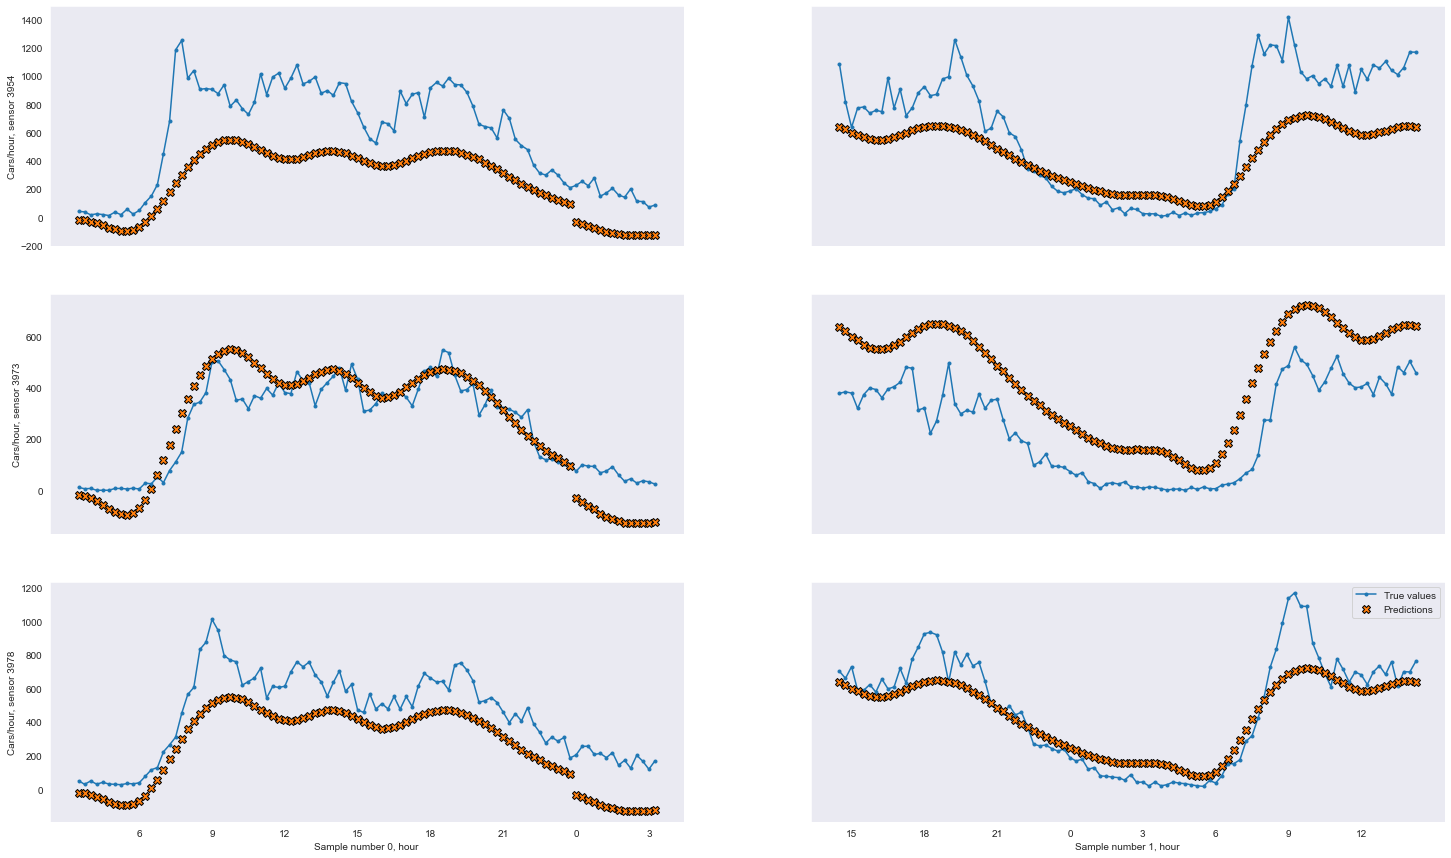

In [22]:
plot_predictions_from_features(estimators, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], features_from_index=features_from_index)

In [6]:
train_data.x[0, :, 0, :]

array([[3.340e+02, 1.000e+00, 0.000e+00, ..., 4.500e-01, 8.900e+00,
        0.000e+00],
       [3.970e+02, 1.250e+00, 0.000e+00, ..., 4.250e-01, 8.725e+00,
        0.000e+00],
       [5.960e+02, 1.500e+00, 0.000e+00, ..., 4.000e-01, 8.550e+00,
        0.000e+00],
       ...,
       [1.340e+02, 1.225e+01, 0.000e+00, ..., 4.450e-01, 1.655e+01,
        4.155e+02],
       [1.600e+02, 1.250e+01, 0.000e+00, ..., 4.700e-01, 1.710e+01,
        4.300e+02],
       [1.590e+02, 1.275e+01, 0.000e+00, ..., 4.950e-01, 1.765e+01,
        4.445e+02]])

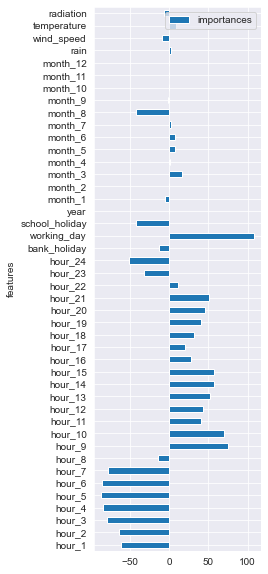

In [7]:
coefs = pipeline[-1].coef_
fig, ax = plt.subplots(figsize=(3, 10))
pd.DataFrame(zip(coefs, column_names[features_from_index:])).rename(columns={0: "importances", 1: "features"}).plot.barh(x=1, ax=ax)
plt.show()

In [13]:
p = make_pipeline(
    ColumnTransformer([
        ("hour", OneHotEncoder(handle_unknown="ignore", sparse=False), ["hour"]),
        ("is_workingday", FunctionTransformer(lambda x: x == True), ["working_day"])
    ]),
    ColumnTransformer([
        (f"interaction_{i}", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)) for i in range(4)
    ])
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    #ColumnTransformer([
    #    ("marginal", "drop", list(range(4+1))),
    #], remainder="passthrough")
)

df = pd.DataFrame({"hour": [1, 2, 3, 4], "working_day": [1, 1, 0, 0]})
p.fit_transform(df)

array([[1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))

train_set, test_set = all_splits[0]
ax.plot(y.iloc[test_set][:4*4*24].reset_index(drop=True), "x-", alpha=0.2, label="real", color="black")

parameters = {}
for i in range(2):
    precipitacion = choice(precipitacion_v)
    viento = choice(viento_v)
    estacion = choice(estacion_v)
    dia_semana = choice(temporal_v)
    mes = choice(temporal_v)
    dia = choice(temporal_v)
    hora = choice(temporal_v)
    prediction = choice(prediction_v)
    interactions = choice(interactions_v)
    
    parameters[i] = {
        "precipitacion" : precipitacion,
        "viento": viento,
        "estacion": estacion,
        "dia_semana": dia_semana,
        "mes": mes,
        "dia": dia,
        "hora": hora,
        "prediction": prediction,
        "interactions": interactions
    }

    precipitacion_columns = {
        "one_hot": ["no_rain", "moderate_rain", "strong_rain"]
    }

    estacion_columns  = {
        "drop": [],
        "ordinal": ["estacion"]
    }
    def temp_columns(dimension, approach):
        if approach == "numeric":
            return [dimension]
        elif approach == "one_hot":
            return [f"{dimension}_{i+1}" for i in range(period_dict[dimension])]
        elif approach == "spline":
            return [f"{dimension}_{i+1}" for i in range(period_dict[dimension]//2)]
        elif approach == "drop":
            return []
        else:
            return [f"sin_{dimension}", f"cos_{dimension}"]
        
    interactions_columns = {
        False: [],
        "poly": ["workingday_hour_interaction"],
        "kernel": []
    }

    features = passthrough_columns + precipitacion_columns.get(precipitacion, ["precipitacion"]) + columns_viento[viento] + estacion_columns[estacion] + bool_columns\
               + temp_columns("dia_semana", dia_semana) + temp_columns("mes", mes) + temp_columns("dia", dia) + temp_columns("hora", hora) + interactions_columns[interactions]

    pipeline = traffic_predictor(precipitacion=precipitacion, viento=viento, estacion=estacion, prediction=prediction,
                                   dia_semana=dia_semana, mes=mes, dia=dia, hora=hora, interactions=interactions)
    pipeline.fit(X, y)
    ax.plot(pipeline.predict(X.iloc[test_set])[:4*4*24], "x-", label=interactions)
    #mae, rmse = evaluate(pipeline, X, y, cv=ts_cv)
    #parameters[i]["mae"] = f"{mae.mean():.3f} +/- {mae.std():.3f}"
    #parameters[i]["rmse"] = f"{rmse.mean():.3f} +/- {rmse.std():.3f}"
    #ax.set_title(f"{prediction}\nmae:{parameters[i]['mae']}\nrmse:{parameters[i]['rmse']}")


plt.legend()
plt.show()

In [ ]:
pd.DataFrame(parameters).transpose()

## Are results better with interactions?

In [ ]:
mae = {False: [], "kernel": []}
rmse = {False: [], "kernel": []}

for i in range(10):
    precipitacion = choice(precipitacion_v)
    viento = choice(viento_v)
    estacion = choice(estacion_v)
    dia_semana = choice(temporal_v)
    mes = choice(temporal_v)
    dia = choice(temporal_v)
    hora = choice(temporal_v)
    prediction = "ridgecv"#choice(prediction_v)
    
    for interactions in [False, "kernel"]:
        pipeline = traffic_predictor(precipitacion=precipitacion, viento=viento, estacion=estacion, prediction=prediction,
                                       dia_semana=dia_semana, mes=mes, dia=dia, hora=hora, interactions=interactions)
        maei, rmsei= evaluate(pipeline, X, y, cv=ts_cv)
        mae[interactions].append(maei.mean())
        rmse[interactions].append(rmsei.mean())

In [ ]:
r = pd.DataFrame(mae)
r["dif"] = r["kernel"] - r[False]
r

In [ ]:
r.dif.median()

In [ ]:
r = pd.DataFrame(mae)
r["dif"] = r[True] - r[False]
r

In [ ]:
r.dif.median()

In [ ]:
rmse

In [ ]:
pipeline.set_params(precipitacion="one_hot")

In [ ]:
pipeline.pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
reg = traffic_predictor(precipitacion, viento, estacion, dia_semana, mes, dia, hora, prediction)
parameters = dict(
    precipitacion__key=precipitacion_v,
    viento=viento_v,
    estacion=estacion_v,
    dia_semana=temporal_v,
    dia=temporal_v,
    hora=temporal_v,
    mes=temporal_v,
    prediction=prediction_v
)
clf = GridSearchCV(reg, parameters, cv=ts_cv)
clf.fit(X, y)

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values("rank_test_score").head().loc[:, :"param_dia"]

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values("rank_test_score").tail().loc[:, :"param_dia"]

In [ ]:
pd.DataFrame(clf.cv_results_).to_csv("gridsearch_results.csv")

In [ ]:
coefs = pipeline[-1].coef_
fig, ax = plt.subplots(figsize=(3, 10))
pd.DataFrame(zip(coefs, features)).rename(columns={0: "importances", 1: "features"}).plot.barh(x=1, ax=ax)
plt.show()

In [ ]:
pd.DataFrame(zip(cyclic_cossin_linear_pipeline[1].coef_, features)).plot.barh(x=1, ax=ax)


In [ ]:
evaluate(pipeline, X, y, cv=ts_cv)

In [ ]:
evaluate(pipeline, X, y, cv=ts_cv)

In [ ]:
evaluate(pipeline, X, y, cv=ts_cv)

In [ ]:
evaluate(pipeline, X, y, cv=ts_cv)

In [ ]:
xt.shape

In [ ]:
evaluate(pipeline, X, y, cv=ts_cv)

In [ ]:
evaluate(pipeline, X, y, cv=ts_cv)

In [ ]:
evaluate(pipeline, X, y, cv=ts_cv)

In [ ]:
pipeline.predict(X.iloc[test_0])[:4*4*24]

In [ ]:
_, test_set = all_splits[2]
plt.plot(pipeline.predict(X.iloc[test_set])[:4*4*24], label="prediction")
plt.plot(y.iloc[test_set][:4*4*24].reset_index(drop=True), label="real")
plt.legend()
plt.show()

In [ ]:
_, test_set = all_splits[2]
plt.plot(pipeline.predict(X.iloc[test_set])[:4*4*24], label="prediction")
plt.plot(y.iloc[test_set][:4*4*24].reset_index(drop=True), label="real")
plt.legend()
plt.show()

In [ ]:
y.iloc[test_0][:4*4*24].reset_index(drop=True)

In [ ]:
for t in pipeline.transformer_list:
    print(t[1].transformers_)

In [ ]:
preprocessing_pipeline(precipitacion="ordinal", viento="cantidad").fit_transform(X).shape

In [ ]:
preprocessing_pipeline(precipitacion="ordinal", viento="xy", estacion="drop")

In [ ]:
np.unique(rain_categories_transformer.transform(df.precipitacion), return_counts=True)

# Gradient Boosting

In [ ]:


categorical_columns = [
    "precipitacion",
    "holiday",
    "estacion",
    "dia_laborable",
    "vac_escolares"
]
categories = [
    ["seco", "ligera", "moderada", "fuerte"],
    [False, True],
    ["primavera", "verano", "otono", "invierno"],
    [False, True],
    [False, True]
]


ordinal_encoder = OrdinalEncoder(categories=categories)

gbrt_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ],
        remainder="passthrough",
    ),
    HistGradientBoostingRegressor(
        categorical_features=range(4)
    )
)

In [ ]:
X

In [ ]:
df.dtypes

In [ ]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"]
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}\n"
    )
    return cv_results
    
evaluate(gbrt_pipeline, X, y, cv=ts_cv)

# Naive linear regression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
alphas = np.logspace(-6, 6, 25)
naive_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns)
        ],
        remainder=MinMaxScaler()
    ),
    RidgeCV(alphas=alphas)
)

evaluate(naive_linear_pipeline, X, y, cv=ts_cv)

In [ ]:
naive_linear_pipeline[0]

In [ ]:
xt = naive_linear_pipeline[0].fit_transform(X[categorical_columns])
#naive_linear_pipeline[0].get_features_names_out()

In [ ]:
naive_linear_pipeline[0].get_feature_names_out()

In [ ]:
naive_linear_pipeline.fit(X, y)

In [ ]:
fig, ax = plt.subplots(figsize=(3, 10))
pd.DataFrame(zip(naive_linear_pipeline[1].coef_, naive_linear_pipeline[0].get_feature_names_out())).plot.barh(x=1, ax=ax)
plt.show()

# Time-steps as categories

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

In [ ]:
hour_pipeline = Pipeline([
    ("round", KBinsDiscretizer(n_bins=24, encode="ordinal")),
    ("one_hot_hour", one_hot_encoder)
])

one_hot_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
            ("one_hot_time", one_hot_encoder, ["weekday", "month"]),
            ("one_hot_hour", hour_pipeline, ["hour"])
        ],
        remainder=MinMaxScaler()
    ),
    RidgeCV(alphas=alphas)
)
evaluate(one_hot_linear_pipeline, X, y, cv=ts_cv)

In [ ]:
one_hot_linear_pipeline.fit(X, y)

In [ ]:
t = one_hot_linear_pipeline[0]
t

# Trigonometric features

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x/period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x/period * 2 * np.pi))

In [ ]:
hour_df = pd.DataFrame(
    np.arange(26).reshape(-1, 1),
    columns=["hour"]
)
hour_df["hour_sin"] = sin_transformer(24).fit_transform(hour_df)["hour"]
hour_df["hour_cos"] = cos_transformer(24).fit_transform(hour_df)["hour"]
hour_df.plot(x="hour")
_ = plt.title("Trigonometric encoding for the 'hour' feature")

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(hour_df["hour_sin"], hour_df["hour_cos"], c=hour_df["hour"])
ax.set(
    xlabel="sin(hour)",
    ylabel="cos(hour)"
)
_ = fig.colorbar(sp)

In [ ]:
cyclic_cossin_transformer = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, categorical_columns),
        ("month_sin", sin_transformer(12), ["month"]),
        ("month_cos", cos_transformer(12), ["month"]),
        ("weekday_sin", sin_transformer(7), ["weekday"]),
        ("weekday_cos", cos_transformer(7), ["weekday"]),
        ("hour_sin", sin_transformer(24), ["hour"]),
        ("hour_cos", cos_transformer(24), ["hour"]),
    ],
    remainder=MinMaxScaler()
)
cyclic_cossin_linear_pipeline = make_pipeline(
    cyclic_cossin_transformer,
    RidgeCV(alphas=alphas)
)
evaluate(cyclic_cossin_linear_pipeline, X, y, cv=ts_cv)

In [ ]:
cyclic_cossin_linear_pipeline.fit(X, y)

In [ ]:
t = cyclic_cossin_linear_pipeline[0]

In [ ]:
t.transformers_[0]

In [ ]:
features = []
for ti in t.transformers_:
    try:
        ni = ti[1].n_features_out_
        fi = ti[1].get_feature_names_out()[:ni]
    except Exception:
        try:
            fi = ti[1].get_feature_names_out()
        except Exception:
            fi = [ti[0]]
    features += list(fi)
    
xt = pd.DataFrame(t.transform(X), columns=features)
pd.concat([X.hour, xt[[c for c in xt.columns if "hour" in c]].iloc[:4*24]], axis="columns").plot(x="hour")
plt.show()

In [ ]:
np.cos(1/24*2*np.pi)

In [ ]:
pd.concat([X.hour, xt[[c for c in xt.columns if "hour" in c]].iloc[:91]], axis="columns").dropna().plot(x="hour")

In [ ]:
fig, ax = plt.subplots(figsize=(3, 10))
pd.DataFrame(zip(cyclic_cossin_linear_pipeline[1].coef_, features)).plot.barh(x=1, ax=ax)
plt.show()

# Periodic spline features

In [ ]:
from sklearn.preprocessing import SplineTransformer

def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True
    )

In [ ]:
hour_df = pd.DataFrame(
    np.linspace(0, 26, 1000).reshape(-1, 1),
    columns=["hour"],
)
splines = periodic_spline_transformer(24, n_splines=12).fit_transform(hour_df)
splines_df = pd.DataFrame(
    splines,
    columns=[f"spline_{i}" for i in range(splines.shape[1])],
)
pd.concat([hour_df, splines_df], axis="columns").plot(x="hour", cmap=plt.cm.tab20b)
_ = plt.title("Periodic spline-based encoding for the 'hour' feature")

In [ ]:
cyclic_spline_transformer = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, categorical_columns),
        ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
        ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["weekday"]),
        ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
    ],
    remainder=MinMaxScaler(),
)
cyclic_spline_linear_pipeline = make_pipeline(
    cyclic_spline_transformer,
    RidgeCV(alphas=alphas)
)
evaluate(cyclic_spline_linear_pipeline, X, y, cv=ts_cv)

In [ ]:
cyclic_spline_linear_pipeline.fit(X, y)

In [ ]:
t = cyclic_spline_linear_pipeline[0]

In [ ]:
features = []
for ti in t.transformers_:
    try:
        ni = ti[1].n_features_out_
        fi = ti[1].get_feature_names_out()[:ni]
    except Exception:
        fi = ti[1].get_feature_names_out()
    features += list(fi)
    
xt = pd.DataFrame(t.transform(X), columns=features)
xt[[c for c in xt.columns if "hour" in c]].iloc[:4*24].plot()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(3, 10))
pd.DataFrame(zip(cyclic_spline_linear_pipeline[1].coef_, features)).plot.barh(x=1, ax=ax)
plt.show()

# Qualitatve analysis

In [ ]:
train_set, test_set = all_splits[2]

naive_linear_pipeline.fit(X.iloc[train_set], y.iloc[train_set])
naive_linear_predictions = naive_linear_pipeline.predict(X.iloc[test_set])

one_hot_linear_pipeline.fit(X.iloc[train_set], y.iloc[train_set])
one_hot_linear_predictions = one_hot_linear_pipeline.predict(X.iloc[test_set])

cyclic_cossin_linear_pipeline.fit(X.iloc[train_set], y.iloc[train_set])
cyclic_cossin_linear_predictions = cyclic_cossin_linear_pipeline.predict(X.iloc[test_set])

cyclic_spline_linear_pipeline.fit(X.iloc[train_set], y.iloc[train_set])
cyclic_spline_linear_predictions = cyclic_spline_linear_pipeline.predict(X.iloc[test_set])

gbrt_pipeline.fit(X.iloc[train_set], y.iloc[train_set])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_set])

In [ ]:
last_hours = slice(-96, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by linear models")
ax.plot(
    y.iloc[test_set].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual demand",
    color="black",
)
ax.plot(naive_linear_predictions[last_hours], "x-", label="Ordinal time features")
ax.plot(
    cyclic_cossin_linear_predictions[last_hours],
    "x-",
    label="Trigonometric time features",
)
ax.plot(
    cyclic_spline_linear_predictions[last_hours],
    "x-",
    label="Spline-based time features",
)
ax.plot(
    one_hot_linear_predictions[last_hours],
    "x-",
    label="One-hot time features",
)

ax.plot(
    gbrt_predictions[last_hours],
    "x-",
    label="Gradient Boost",
)
_ = ax.legend()

In [ ]:
naive_linear_pipeline[:-1].transform(X).shape

In [ ]:
one_hot_linear_pipeline[:-1].transform(X).shape

In [ ]:
cyclic_cossin_linear_pipeline[:-1].transform(X).shape

In [ ]:
cyclic_spline_linear_pipeline[:-1].transform(X).shape

# Pairwise interactions with splines and polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import FeatureUnion


hour_workday_interaction = make_pipeline(
    ColumnTransformer(
        [
            ("cyclic_hour", periodic_spline_transformer(24, n_splines=8), ["hour"]),
            ("workingday", FunctionTransformer(lambda x: x == "True"), ["dia_laborable"]),
        ]
    ),
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
)

In [ ]:
X

In [ ]:
cyclic_spline_interactions_pipeline = make_pipeline(
    FeatureUnion(
        [
            ("marginal", cyclic_spline_transformer),
            ("interactions", hour_workday_interaction),
        ]
    ),
    RidgeCV(alphas=alphas),
)
evaluate(cyclic_spline_interactions_pipeline, X, y, cv=ts_cv)

In [ ]:
cyclic_spline_interactions_pipeline

In [ ]:
from sklearn.kernel_approximation import Nystroem


cyclic_spline_poly_pipeline = make_pipeline(
    cyclic_spline_transformer,
    Nystroem(kernel="poly", degree=2, n_components=300, random_state=0),
    RidgeCV(alphas=alphas),
)
evaluate(cyclic_spline_poly_pipeline, X, y, cv=ts_cv)

In [ ]:
one_hot_poly_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
            ("one_hot_time", one_hot_encoder, ["hour", "weekday", "month"]),
        ],
        remainder="passthrough",
    ),
    Nystroem(kernel="poly", degree=2, n_components=300, random_state=0),
    RidgeCV(alphas=alphas),
)
evaluate(one_hot_poly_pipeline, X, y, cv=ts_cv)

In [ ]:
train_set, test_set = all_splits[2]


gbrt_pipeline.fit(X.iloc[train_set], y.iloc[train_set])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_set])

one_hot_poly_pipeline.fit(X.iloc[train_set], y.iloc[train_set])
one_hot_poly_predictions = one_hot_poly_pipeline.predict(X.iloc[test_set])

cyclic_spline_poly_pipeline.fit(X.iloc[train_set], y.iloc[train_set])
cyclic_spline_poly_predictions = cyclic_spline_poly_pipeline.predict(X.iloc[test_set])

last_hours = slice(-96, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by non-linear regression models")
ax.plot(
    y.iloc[test_set].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual demand",
    color="black",
)
ax.plot(
    gbrt_predictions[last_hours],
    "x-",
    label="Gradient Boosted Trees",
)
ax.plot(
    one_hot_poly_predictions[last_hours],
    "x-",
    label="One-hot + polynomial kernel",
)
ax.plot(
    cyclic_spline_poly_predictions[last_hours],
    "x-",
    label="Splines + polynomial kernel",
)
_ = ax.legend()

In [ ]:
X.iloc[train_set].month.value_counts()

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    one_hot_poly_predictions,
    cyclic_spline_poly_predictions,
    gbrt_predictions,
]
labels = [
    "One hot + polynomial kernel",
    "Splines + polynomial kernel",
    "Gradient Boosted Trees",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_set].values, pred, alpha=0.3, label=label)
    ax.plot([0, 1], [0, 1], "--", label="Perfect model")
    ax.set(
        xlim=(0, 1),
        ylim=(0, 1),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [ ]:
set_config(display='diagram')  

In [ ]:
meteo_interpolator = ColumnTransformer(
    transformers=[("interpolation", interpolate_transformer, mmagns)],
    remainder="passthrough"
)
pipeline = Pipeline(
    steps=[("interpolation", meteo_interpolator)]
)

In [ ]:
pipeline

In [ ]:
pd.DataFrame(pipeline.fit_transform(df), columns=mmagns+tmagns, index=df.index).head(20)

In [ ]:
df.head(20)

In [ ]:
interpolate_transformer.transform(df[["temperatura"]])

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
df.plot(subplots=True, ax=ax)
plt.show()

In [ ]:
df = df.sort_index()
df[mmagns] = df[mmagns].interpolate(method="linear", limit=4)

In [ ]:
df[tmagns].info()

In [ ]:
df[tmagns].apply(make_stable_values_null).info()

In [ ]:
df.reset_index().fecha.apply(tipo_dia)

In [ ]:
df["tipo_dia"] = df.index.values.apply(tipo_dia)
df.head()

In [ ]:
pd.DataFrame(no_change_t.transform(df[tmagns]))

In [ ]:
df = df.merge(df.tipo_dia.str.get_dummies().iloc[:, [1, 2]], left_index=True, right_index=True)
del df['dia_semana'], df['tipo_dia']

In [ ]:
tipo_dia_t.transform(df.index)

In [ ]:
from custom_transformers import day_type

In [ ]:
precipitacion = choice(precipitacion_v)
viento = choice(viento_v)
estacion = choice(estacion_v)
dia_semana = choice(temporal_v)
mes = choice(temporal_v)
dia = choice(temporal_v)
hora = choice(temporal_v)
prediction = choice(prediction_v)

pipeline = predicting_pipeline(precipitacion=precipitacion, viento=viento, estacion=estacion, prediction=prediction,
                               dia_semana=dia_semana, mes=mes, dia=dia, hora=hora)
pipeline

In [ ]:
"""
passthrough = ColumnTransformer(
    transformers=[
        ("passthrough", "passthrough", ["temperatura", "humedad_relativa", "presion_barometrica", "radiacion_solar", "anyo"])
    ]
)

def preprocessing_pipeline(precipitacion, viento, estacion, dia_semana, mes, dia, hora):
    return FeatureUnion([
    ("passthrough", passthrough),
    ("precipitacion", precipitacion_preprocessing(precipitacion)),
    ("viento", viento_selection(viento)),
    ("estacion", estacion_preprocessing(estacion)),
    ("bool", bool_preprocessing()),
    ("temporal", temporal_preprocessing(dia_semana, mes, dia, hora))
    ])
    
def bool_preprocessing():
    return ColumnTransformer([("bool", OrdinalEncoder(categories=bool_categories), bool_columns)])
"""


def temporal_preprocessing(dia_semana, mes, dia, hora):
    period_dict = dict(
        mes=12,
        dia_semana=7,
        dia=30,
        hora=24
    )

    def transformer(approach, period):
        if approach == "numeric":
            return "passthrough"
        elif approach == "one_hot":
            return OneHotEncoder(handle_unknown="ignore", sparse=False)
        elif approach == "trigonometric":
            return sincos(period)
        elif approach == "spline":
            return periodic_spline_transformer(period, n_splines=period//2)

    if hora == "one_hot":
        transformer_hora = make_pipeline(
            KBinsDiscretizer(n_bins=24, encode="ordinal"),
            transformer(hora, period_dict["hora"])
        )
    else:
        transformer_hora = transformer(hora, period_dict["hora"])
        
    transformers = [
        ("dia_semana", transformer(dia_semana, period_dict["dia_semana"]), ["dia_semana"]),
        ("mes", transformer(mes, period_dict["mes"]), ["mes"]),
        ("dia", transformer(dia, period_dict["dia"]), ["dia"]),
        ("hora", transformer_hora, ["hora"]),
    ]
    return ColumnTransformer(transformers)